# Assigment 1

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find stationary equilibrium](#toc2_)    
- 3. [Vary tax rate](#toc3_)    
- 4. [Transition path](#toc4_)    
  - 4.1. [Prepare](#toc4_1_)    
  - 4.2. [Find transition path](#toc4_2_)    
  - 4.3. [Analyze](#toc4_3_)    
- 5. [Extra: Optimal policy](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCAssignmentModel import HANCModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANCModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Find stationary equilibrium](#toc0_)

Test household problem:

In [4]:
model.ss.w0 = 1.0
model.ss.w1 = 1.0
model.ss.rK = 0.01
model.ss.phi0 = 1.0
model.ss.phi1 = 2.0

#model.solve_hh_ss(do_print=True)
#model.simulate_hh_ss(do_print=True)

In [5]:
model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [71 iterations]
household problem in ss simulated in 1.0 secs [2 iterations]


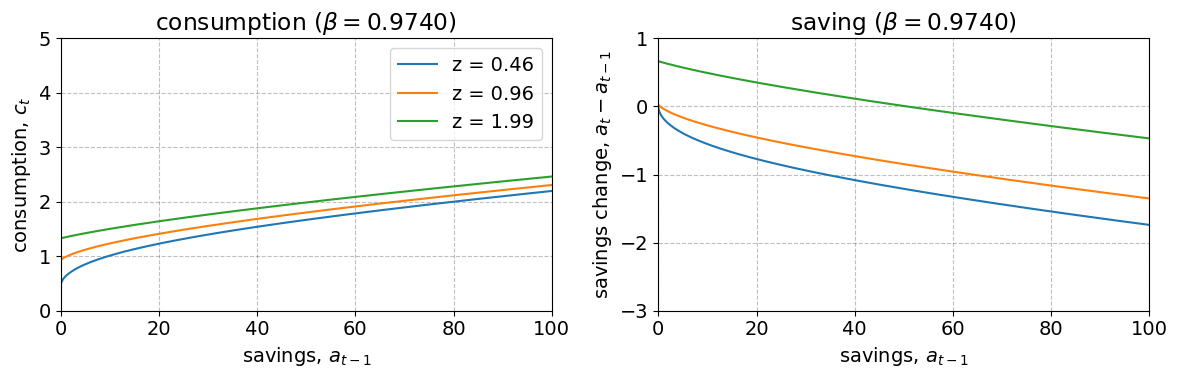

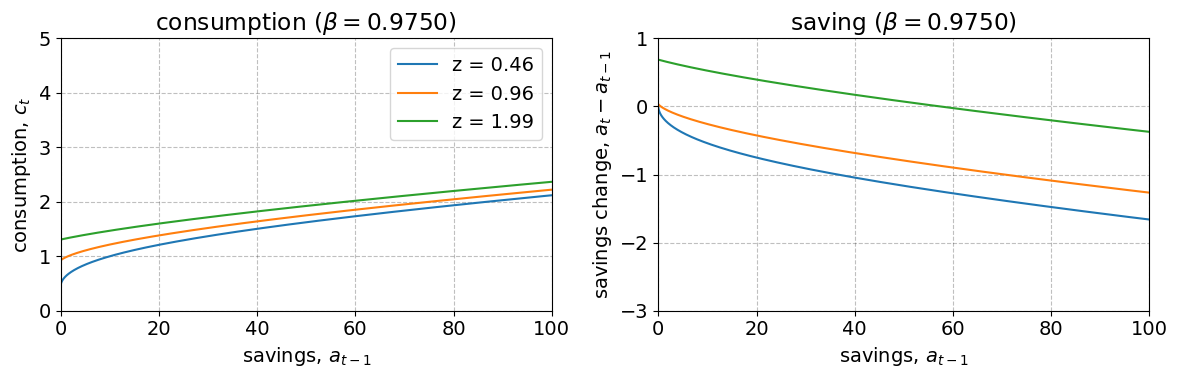

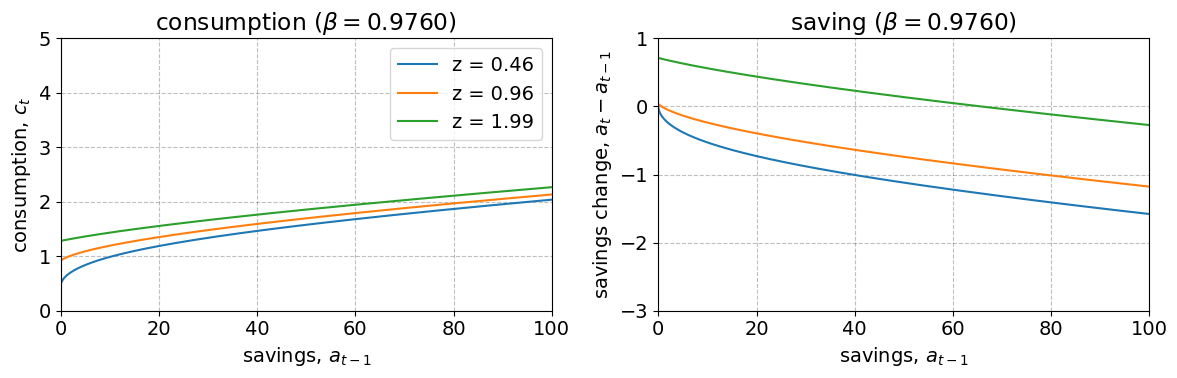

In [7]:
for i_beta,beta in enumerate(par.beta_grid[:len(par.beta_grid)//2]):
    
    fig = plt.figure(figsize=(12,4),dpi=100)

    I = par.a_grid < 500

    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],ss.c[i_beta,i_z,I],label=f'z = {z:.2f}')

    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f}$)')

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],ss.a[i_beta,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,1)

    fig.tight_layout()
    #fig.savefig(f'figs/c_func_{i_beta}.pdf')

Find stationary equilibrium:

In [6]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.rK = 0.2225
implied ss.w0 = 0.2966
implied ss.w1 = 0.5933
household problem in ss solved in 0.6 secs [634 iterations]
household problem in ss simulated in 0.1 secs [635 iterations]
implied ss.A_hh = 297.6287
clearing_A = -296.62874408

guess ss.K = 2.0000
implied ss.rK = 0.1428
implied ss.w0 = 0.3807
implied ss.w1 = 0.7614
household problem in ss solved in 2.8 secs [3368 iterations]
household problem in ss simulated in 0.1 secs [801 iterations]
implied ss.A_hh = 381.7010
clearing_A = -379.70101211

guess ss.K = 3.0000
implied ss.rK = 0.1101
implied ss.w0 = 0.4405
implied ss.w1 = 0.8811
household problem in ss solved in 0.5 secs [619 iterations]
household problem in ss simulated in 0.0 secs [473 iterations]
implied ss.A_hh = 1.4252
clearing_A =   1.57484366

guess ss.K = 4.0000
implied ss.rK = 0.0916
implied ss.w0 = 0.4886
implied ss.w1 = 0.9772
household problem in ss solved in 0.3 secs [313 iterations]
household problem in s

In [8]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 2.7750
L0             : 0.6667
L1             : 0.3333
rK             : 0.1158
w0             : 0.4283
w1             : 0.8567
Y              : 0.8924
phi0           : 1.0000
phi1           : 2.0000
A_hh           : 2.7750
C_hh           : 1.0000
L_hh           : 1.0000
A              : 2.7750
L0_hh          : nan
L1_hh          : nan
I              : 0.2775
clearing_A     : 0.0000
clearing_L0    : nan
clearing_L1    : nan
clearing_Y     : -0.3851


In [9]:
model.info()

settings:
 par.py_hh = True
 par.py_block = True
 par.full_z_trans = False
 par.T = 500

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [rK,w0,w1,phi0,phi1]
 inputs_hh_z: []
 outputs_hh: [a,c,l]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: [phi0,phi1]
 unknowns: [rK,w0,w1]
 targets: []

blocks (inputs -> outputs):
 production_firm: [rK,w0,w1] -> [Gamma,K,L0,L1,Y]
 hh: [phi0,phi1,rK,w0,w1] -> [A_hh,C_hh,L_hh]
 market_clearing: [A_hh,L0,L1,Y,C_hh,K] -> [A,L0_hh,L1_hh,I,clearing_A,clearing_L0,clearing_L1,clearing_Y]


## 3. <a id='toc3_'></a>[Varying productivity](#toc0_)

## 4. <a id='toc4_'></a>[Transition path](#toc0_)

In [ ]:
model.info(only_blocks=True)
model.draw_DAG(figsize=(10,10))

### 4.1. <a id='toc4_1_'></a>[Prepare](#toc0_)

In [ ]:
model.find_ss(tau=tau_max_U_hh)

In [ ]:
model.test_hh_path()

In [ ]:
model.test_path()

**Jacobians:**

In [ ]:
model.compute_jacs()

**Higher bond price:** Always less savings due to lower return.

**Higher tax rate:**

1. Lower savings when in effect due to lower income
2. Higher savings when expected due to lower *future* income

In [ ]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    if i == 1:
        ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

### 4.2. <a id='toc4_2_'></a>[Find transition path](#toc0_)

In [ ]:
jump = ss.G*0.01
rho = 0.95
dG = jump*rho**np.arange(par.T)

In [ ]:
model.find_transition_path(shocks={'dG':dG},do_print=True) #important you can only call a variable defined as shock already
path = model.path

### 4.3. <a id='toc4_3_'></a>[Analyze](#toc0_)

The government issues more bonds. Bond price fall and tax increases. Average utility falls.

In [ ]:
model.show_IRFs(varnames=['B','pB','tau','U_hh'],lvl_value=['U_hh'],ncols=2)

Expected discounted utility falls.

In [ ]:
V_hh_ss = np.sum([par.beta**t*ss.U_hh for t in range(par.T)])
V_hh = np.sum([par.beta**t*path.U_hh[t] for t in range(par.T)])
print(f'{V_hh_ss = :.5f}')
print(f'{V_hh = :.5f}')

Initially savings increase both due to taxes (less future income) and higher return (lower bond price). Lower taxes reduce savings.

In [ ]:
T_max = 50

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
    
i_color = 0
for use_inputs in [['tau'],['pB'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.A_hh[:50]/ss.A_hh-1)*100,ls=ls,color=color,label=label);

ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True,bbox_to_anchor=(1.01,0.99));

Consumption inequality decreases. But small effect relative to the lower mean.

In [ ]:
mean_c_ss = np.sum(ss.D*ss.c)
std_c_ss = np.sqrt(np.sum(ss.D*(ss.c-mean_c_ss)**2))   

for t in range(20):

    mean_c = np.sum(path.D[t]*path.c[t])
    std_c = np.sqrt(np.sum(path.D[t]*(path.c[t]-mean_c)**2))   

    print(f't = {t:2d}: {mean_c-mean_c_ss:7.4f}, {std_c-std_c_ss:7.4f}')

## 5. <a id='toc5_'></a>[Extra: Optimal policy](#toc0_)

**Questions:** Will a utiliarian planner always set the tax rate so it maximizes steady state social welfare?

In [ ]:
for add in [-0.01,0.01]:

    # a. initial steady state
    model_tau_alt = model.copy()
    model_tau_alt.find_ss(tau=tau_max_U_hh+add)

    # b. transition to new steady state 
    model.find_transition_path(shocks=[],ini=model_tau_alt.ss.__dict__,do_print=False)
    path = model.path

    # b. change in expected discounted utility
    V_hh_ss = np.sum([par.beta**t*model_tau_alt.ss.U_hh for t in range(par.T)])
    V_hh = np.sum([par.beta**t*path.U_hh[t] for t in range(par.T)])
    print(f'tau {tau_max_U_hh+add:.3} -> {tau_max_U_hh:.3f}: {V_hh-V_hh_ss = :8.5f}')


If the initial tax rate is low, the transition is beneficial. Social welfare increases.

If the initial tax rate is high, the transition is not beneficial. Social welfare increase.

**Insight:** Optimal policy needs to account for the transition.

**Questions:** Could there ne another transition, which makes the policy beneficial?
